In [12]:
%load_ext autoreload
%autoreload 2

from bosonicplus.states.nongauss import prepare_gkp_nonlinear_sqz
from bosonicplus.plotting import plot_wigner_marginals, plot_wig
from bosonicplus.effective_sqz import effective_sqz, get_gkp_stabilizer
from bosonicplus.gkp_squeezing import gkp_nonlinear_squeezing_operator, Q_expval, get_gkp_squeezing_displacements
from bosonicplus.operations.symplectic import rotation
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from bosonicplus.conversions import to_dB, Delta_to_dB
import seaborn as sns

hbar = 2
colwidth = 3.41667

fs = 10

mpl.rcParams.update({'font.size': fs, 
                     "text.usetex":  True, 
                     'font.family':'serif',
                     'xtick.labelsize': 8, 
                     'ytick.labelsize':8 })


kwargs = {'grid': 'square', 
          'fontsize' : fs, 
          'title': None, 
          'figsize' :(colwidth,colwidth), 
          'linewidth':1,
          'xlim': 4,
          'plim': 4}

fig_kwargs = {'dpi':800, 'bbox_inches': 'tight'}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
def print_test(n, lattice):
    
    print('GKP: ', lattice)
    
    gkp = prepare_gkp_nonlinear_sqz(n, lattice, fast=True)
    gkp.normalise()

    
    if lattice == '0' or lattice == '1':
        scalex =  np.sqrt(hbar*np.pi)
        scalep =  np.sqrt(hbar*np.pi)
        grid = 'rect'
        xlim = 4
        plim = 4
        
        
        Dx = effective_sqz(gkp, 'rx')
        Dp = effective_sqz(gkp, 'rp')

        b1 = get_gkp_stabilizer('rx')
        b2 = get_gkp_stabilizer('rp')

        
        
        print('Eff sqz rx: ', Dx)
        print('Eff sqz rp: ', Dp)
        print('Eff sqz rx: ', Delta_to_dB(Dx),' dB')
        print('Eff sqz rp: ', Delta_to_dB(Dp),' dB')
       
        
        
    elif lattice == 's0' or lattice == 's1':
        grid = 'square'
        scalex = np.sqrt(2*hbar*np.pi)
        scalep = np.sqrt(2*hbar*np.pi)
        xlim = 3
        plim = 3
        Dx = effective_sqz(gkp, 'sx')
        Dp = effective_sqz(gkp, 'sp')
        print('Eff sqz sx: ',Dx)
        print('Eff sqz sp: ', Dp)
        print('Eff sqz sx: ', Delta_to_dB(Dx),' dB')
        print('Eff sqz sp: ', Delta_to_dB(Dp),' dB')
        b1 = get_gkp_stabilizer('sx')
        b2 = get_gkp_stabilizer('sp')

       
        
    elif lattice == 'h0' or lattice == 'h1': 
        grid = 'hex'
        scalex = (3/4)**(1/4) * np.sqrt(hbar*np.pi)
        scalep = (4/3)**(1/4) * np.sqrt(hbar*np.pi)
        scale = 1
        xlim = 4
        plim = 4
        
        Dx = effective_sqz(gkp, 'hx')
        Dp = effective_sqz(gkp, 'hp')
        print('Eff sqz hx: ',Dx)
        print('Eff sqz hp: ', Dp)
        print('Eff sqz hx: ', Delta_to_dB(Dx),' dB')
        print('Eff sqz hp: ', Delta_to_dB(Dp),' dB')
        b1 = get_gkp_stabilizer('hx')* np.exp(-1j*np.pi/12)
        b2 = get_gkp_stabilizer('hp')* np.exp(-1j*np.pi/12)

        
        
    elif lattice == 'hs0' or lattice == 'hs1': 
        grid = 'hex_square'
        scalex = (3/4)**(1/4) * np.sqrt(2*hbar*np.pi)
        scalep = (4/3)**(1/4) * np.sqrt(2*hbar*np.pi)
        scale =1
        xlim = 3
        plim = 3
        Dx = effective_sqz(gkp, 'hsx')
        Dp = effective_sqz(gkp, 'hsp')
        print('Eff sqz hsx: ',Dx)
        print('Eff sqz hsp: ', Dp)
        print('Eff sqz hsx: ', Delta_to_dB(Dx), ' dB')
        print('Eff sqz hsp: ', Delta_to_dB(Dp), ' dB')
        b1 = get_gkp_stabilizer('hsx') * np.exp(-1j*np.pi/12)
        b2 = get_gkp_stabilizer('hsp') * np.exp(-1j*np.pi/12)

    Ds = np.sqrt((Dx**2 + Dp**2)/2)

    print('symmetric effective squeezing', Ds)
    print('symmetric effective squeezing', Delta_to_dB(Ds), ' dB')
        
    b1 *= np.sqrt(2*hbar)
    b2 *= np.sqrt(2*hbar)

    print('Q_expval: ', Q_expval(gkp,lattice))
    rho = gkp_nonlinear_squeezing_operator(n,lattice= lattice)
    w, v = np.linalg.eigh(rho)
    coeffs = v[:,0] 
    print('First eigenval of Q op (Fock): ', w[0])

    if lattice in ['h0','h1', 'hs0', 'hs1'] :
        gkp.apply_symplectic(rotation(-np.pi/12))


    x = np.linspace(-12,12,300)
    W = gkp.get_wigner_bosonic(x,-x).real
    #W = gkp.get_wigner_log(x,-x).real
    kwargs['grid'] = grid
    kwargs['xlim'] = xlim
    kwargs['plim'] = plim
    
    fig, ax, axx, axp, axc = plot_wigner_marginals(W,x,x, **kwargs)

    arrow_kwargs = {'length_includes_head':True, 'head_width' : 0.2, 'head_length' : 0.2}
    ax.arrow(0,0, b1.real/scalex, b1.imag/scalep, color = 'blue', **arrow_kwargs)
    ax.arrow(0,0, b2.real/scalex, b2.imag/scalep, color = 'red', **arrow_kwargs)
    
    
    
    return fig, ax, axx, axp, axc 
      
    

GKP:  0
Eff sqz rx:  1.063150306387977
Eff sqz rp:  0.441276099646558
Eff sqz rx:  -0.5318933736321318  dB
Eff sqz rp:  7.105791882631266  dB
symmetric effective squeezing 0.8139450749565749
symmetric effective squeezing 1.7880980065914565  dB
Q_expval:  (0.8930252292078615+2.0132550140883332e-14j)
First eigenval of Q op (Fock):  0.8929903512070659


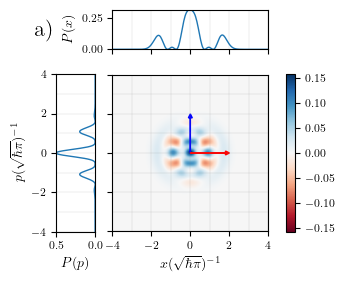

GKP:  1
Eff sqz rx:  0.5035185913800162
Eff sqz rp:  0.47393734815946104
Eff sqz rx:  5.959689787820378  dB
Eff sqz rp:  6.4855813161811255  dB
symmetric effective squeezing 0.488951726577245
symmetric effective squeezing 6.214680319204717  dB
Q_expval:  (0.7029501624305087-4.9414682415371836e-15j)
First eigenval of Q op (Fock):  0.7029327125944254


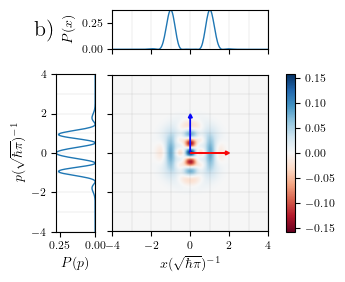

GKP:  s0
Eff sqz sx:  0.5013998127004459
Eff sqz sp:  0.501399878091112
Eff sqz sx:  5.996316652198168  dB
Eff sqz sp:  5.9963155194173865  dB
symmetric effective squeezing 0.50139984539578
symmetric effective squeezing 5.996316085807742  dB
Q_expval:  (0.652507501611373+3.5431726996826285e-16j)
First eigenval of Q op (Fock):  0.6524279826650888


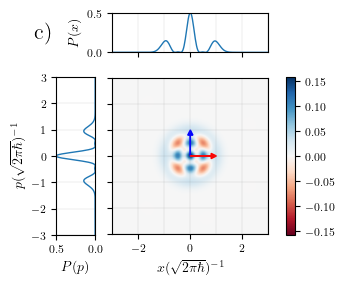

GKP:  s1
Eff sqz sx:  0.5051609224851819
Eff sqz sp:  0.6185296778093858
Eff sqz sx:  5.9314050469521105  dB
Eff sqz sp:  4.172789151105182  dB
symmetric effective squeezing 0.5646974942113089
symmetric effective squeezing 4.963682787944048  dB
Q_expval:  (0.7819594315444023-4.127449250435067e-15j)
First eigenval of Q op (Fock):  0.7819194133721563


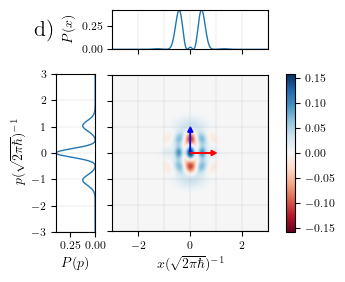

GKP:  h0
Eff sqz hx:  0.4283517944729764
Eff sqz hp:  0.49296235750964157
Eff sqz hx:  7.363988187818817  dB
Eff sqz hp:  6.143724841635675  dB
symmetric effective squeezing 0.4617884503480369
symmetric effective squeezing 6.711138665832075  dB
Q_expval:  (0.7100029121594931-2.802104251756199e-14j)
First eigenval of Q op (Fock):  0.7099712921766144


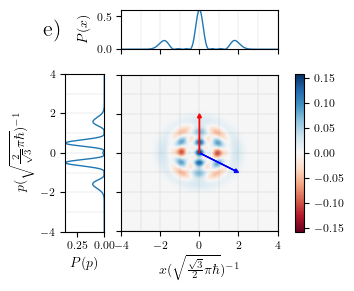

GKP:  h1
Eff sqz hx:  0.44961934386217356
Eff sqz hp:  0.5720846218456812
Eff sqz hx:  6.94310024985275  dB
Eff sqz hp:  4.850794526152319  dB
symmetric effective squeezing 0.5145086825930966
symmetric effective squeezing 5.772145838032785  dB
Q_expval:  (0.7934752690922204+4.7746095271916644e-15j)
First eigenval of Q op (Fock):  0.7934501207561786


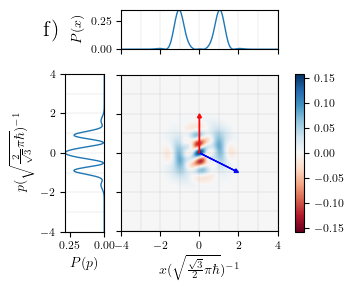

GKP:  hs0
Eff sqz hsx:  0.5279781168783253
Eff sqz hsp:  0.527974741594603
Eff sqz hsx:  5.547681546139583  dB
Eff sqz hsp:  5.5477370738871965  dB
symmetric effective squeezing 0.5279764292391613
symmetric effective squeezing 5.547709309924645  dB
Q_expval:  (0.7937362748030827-2.1399982480518887e-15j)
First eigenval of Q op (Fock):  0.7936637530011644


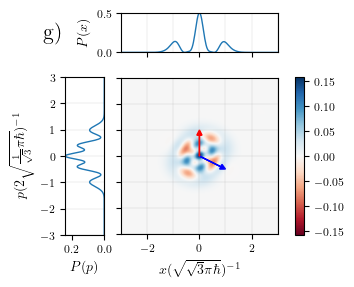

GKP:  hs1
Eff sqz hsx:  0.5568607950289278
Eff sqz hsp:  0.5074390656870389
Eff sqz hsx:  5.085067138055017  dB
Eff sqz hsp:  5.89232202493363  dB
symmetric effective squeezing 0.5327233571121058
symmetric effective squeezing 5.469965225462783  dB
Q_expval:  (0.8033406716830869-6.73831650199741e-17j)
First eigenval of Q op (Fock):  0.8032974515316755


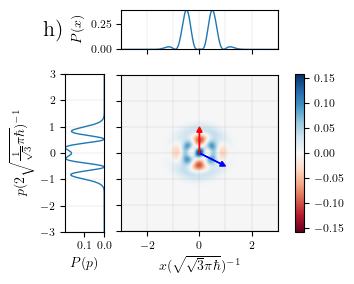

In [14]:
n = 6
lattices = ['0', '1', 's0', 's1', 'h0', 'h1', 'hs0', 'hs1']
labels = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']
for i, lattice in enumerate(lattices):
    
    fig, ax, axx, axp, axc = print_test(n, lattice)
    axx.text(-0.5, 1.25, labels[i], fontsize = 16, transform=ax.transAxes)
    #plt.savefig(f'../figspaper/gkp_squeezing/W_{lattice}_{n}_photons.pdf',**fig_kwargs)
    plt.show()

In [15]:
def plot_gkp_squeezing(ax, nmax, lattice, c, dB = True):
    eigs = np.zeros(nmax+1)
    
    for n in range(nmax+1):
        rho = gkp_nonlinear_squeezing_operator(n,lattice= lattice)
        w, v = np.linalg.eigh(rho)
        eigs[n] = w[0]
        
        

    if dB:
        ax.plot(range(nmax+1), to_dB(eigs),c=c, label =rf'$\xi_{{{lattice}}}$')
        
    else:
        ax.plot(range(nmax+1), eigs, c=c,label = lattice)
       
        
    #plt.ylabel(r'Smallest eigenvalue of $\hat{Q}$ [dB]')
    ax.set_xlabel(r'Photon number, $n$')
    ax.grid('on')
    ax.legend()
    ax.set_ylabel('Squeezing [dB]')
    ax.set_xlim([0,nmax])
    

In [16]:
def plot_effective_squeezing(ax, nmax, lattice, c, dB=True):
    dx = np.zeros(nmax+1)
    dp = np.zeros(nmax+1)
    
    for n in range(nmax+1):
        gkp = prepare_gkp_nonlinear_sqz(n, lattice, fast=True)
    
        if lattice in ['0', '1']:
            dx[n] = effective_sqz(gkp, 'rx')
            dp[n] = effective_sqz(gkp, 'rp')
        elif lattice in ['s0', 's1']:
            dx[n] = effective_sqz(gkp, 'sx')
            dp[n] = effective_sqz(gkp, 'sp')
        elif lattice in ['h0', 'h1']:
            dx[n] = effective_sqz(gkp, 'hx')
            dp[n] = effective_sqz(gkp, 'hp')
        elif lattice in ['hs0', 'hs1']:
            dx[n] = effective_sqz(gkp, 'hsx')
            dp[n] = effective_sqz(gkp, 'hsp')
            
    if dB:
        ax.plot(range(nmax+1), Delta_to_dB((dx+dp)/2), linestyle='--', c= c)
        #plt.plot(range(nmax+1), Delta_to_dB(dp), marker = 's', label = r'$\Delta_p$')
        
    #plt.ylabel(r'Symmetric effective squeezing [dB]')
    #plt.xlabel(r'Photon number, $n$')
    

<function matplotlib.pyplot.show(close=None, block=None)>

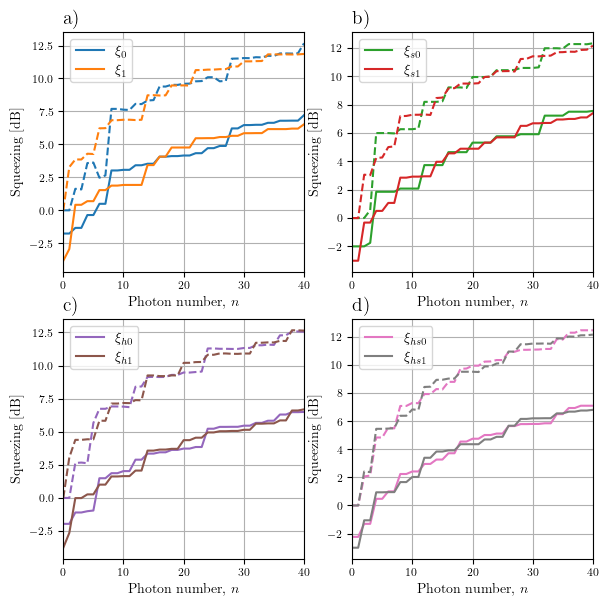

In [17]:
c = sns.color_palette('tab10',)
#c = cmap(np.linspace(0, 1, 8))

nmax = 40

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(2*colwidth,2*colwidth))

lattices = ['0', '1']


for i, lattice in enumerate(lattices):
    plot_gkp_squeezing(ax1,nmax, lattice, c[i])
    plot_effective_squeezing(ax1, nmax, lattice,c[i])

lattices = ['s0', 's1']

for i, lattice in enumerate(lattices):
    plot_gkp_squeezing(ax2,nmax, lattice, c[i+2])
    plot_effective_squeezing(ax2, nmax, lattice,c[i+2])

lattices = ['h0', 'h1']

for i, lattice in enumerate(lattices):
    plot_gkp_squeezing(ax3,nmax, lattice, c[i+4])
    plot_effective_squeezing(ax3, nmax, lattice,c[i+4])

lattices = ['hs0', 'hs1']

for i, lattice in enumerate(lattices):
    plot_gkp_squeezing(ax4,nmax, lattice, c[i+6])
    plot_effective_squeezing(ax4, nmax, lattice,c[i+6])



ax1.set_title('a)', loc = 'left', fontsize = 14)
ax2.set_title('b)', loc = 'left', fontsize = 14)
ax3.set_title('c)', loc = 'left', fontsize = 14)
ax4.set_title('d)', loc = 'left', fontsize = 14)
#plt.savefig(f'../figspaper/gkp_squeezing/gkp_squeezing.pdf',**fig_kwargs)
plt.show